# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [4]:
#pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=316015d003427fca154b9bb957894f423d83fa7fa8be72bbce0229d0ba1cff1b
  Stored in directory: /Users/adityabagchi/Library/Caches/pip/wheels/d9/dd/68/8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
temp = []
lng= []
humidity= []
cloudiness= []
windspeed= []
country= []
date= []
cities1= []



cities= cities[:50]    

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities1.append(city)
        time.sleep(1)
        print(city)
    except: 
        print("data not found")
        pass
    

data not found
busselton
barra patuca
chara
zheleznodorozhnyy
hermanus
sterling
pisco
souillac
nizhniy tsasuchey
hilo
lompoc
thompson
vaini
hobart
tasiilaq
jamestown
ponta do sol
hofn
severo-kurilsk
tilichiki
chapais
fort nelson
lovozero
data not found
atuona
rikitea
saint-philippe
dikson
punta arenas
codrington
cape canaveral
lorengau
rudnaya pristan
georgetown
mataura
srednekolymsk
longyearbyen
ushuaia
data not found
faanui
kaliganj
quatre cocos
torbay
sangar
cherskiy
asilah
kapaa
leningradskiy
morgan city


In [8]:
weather_dict = {
    "city": cities1,
    "lat": lat,
    "maxtemp": temp,
    "lng": lng,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "country": country,
    "date": date
}

weather_dict= pd.DataFrame(weather_dict)
weather_dict.head()

,city,lat,maxtemp,lng,humidity,cloudiness,windspeed,country,date
0,busselton,-33.6500,14.57,115.3333,67,0,6.02,AU,1650584152
1,barra patuca,15.8000,26.10,-84.2833,80,16,4.00,HN,1650584241
2,chara,56.9064,-4.52,118.2631,71,100,2.35,RU,1650584242
3,zheleznodorozhnyy,55.7503,6.75,38.0042,97,100,1.25,RU,1650584243
4,hermanus,-34.4187,13.22,19.2345,90,51,2.69,ZA,1650584245


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict.describe()

,lat,maxtemp,lng,humidity,cloudiness,windspeed,date
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01
mean,21.838802,12.025745,10.508583,77.404255,64.212766,4.492553,1.650584e+09
std,40.477781,12.433426,111.607608,16.099770,37.922654,1.939319,1.064874e+02
min,-54.800000,-17.570000,-175.200000,28.000000,0.000000,1.150000,1.650584e+09
25%,-18.345550,2.020000,-79.920050,68.000000,20.000000,3.090000,1.650584e+09
50%,32.666700,13.220000,15.640100,80.000000,75.000000,4.330000,1.650584e+09
75%,56.328350,24.610000,116.798200,89.500000,100.000000,5.660000,1.650584e+09
max,78.218600,31.270000,178.416700,99.000000,100.000000,10.290000,1.650584e+09


In [9]:
weather_dict.to_csv(output_data_file, index_label= 'city_id')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
extremecity= weather_dict[(weather_dict['humidity']>100)].index
extremecity

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
cleancity= weather_dict.drop(extremecity, inplace= False)
cleancity

,city,lat,maxtemp,lng,humidity,cloudiness,windspeed,country,date
0,busselton,-33.6500,14.57,115.3333,67,0,6.02,AU,1650584152
1,barra patuca,15.8000,26.10,-84.2833,80,16,4.00,HN,1650584241
2,chara,56.9064,-4.52,118.2631,71,100,2.35,RU,1650584242
3,zheleznodorozhnyy,55.7503,6.75,38.0042,97,100,1.25,RU,1650584243
4,hermanus,-34.4187,13.22,19.2345,90,51,2.69,ZA,1650584245
5,sterling,39.0062,18.48,-77.4286,56,100,4.12,US,1650584025
6,pisco,-13.7000,19.45,-76.2167,82,0,10.29,PE,1650584257
7,souillac,-20.5167,24.21,57.5167,83,40,4.12,MU,1650584259
8,nizhniy tsasuchey,50.5167,4.25,115.1333,47,95,4.77,RU,1650584260
9,hilo,19.7297,31.27,-155.0900,73,100,6.17,US,1650584271


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

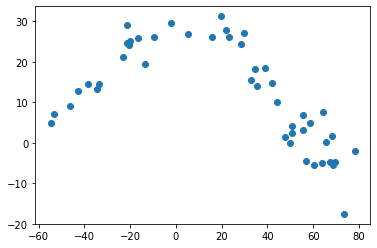

In [12]:
plt.scatter(cleancity['lat'], cleancity['maxtemp'])
plt.show()

## Latitude vs. Humidity Plot

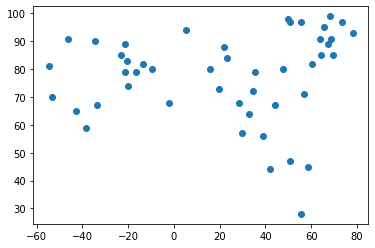

In [13]:
plt.scatter(cleancity['lat'], cleancity['humidity'])
plt.show()

## Latitude vs. Cloudiness Plot

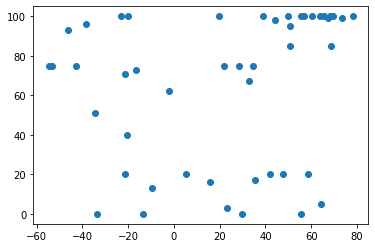

In [14]:
plt.scatter(cleancity['lat'], cleancity['cloudiness'])
plt.show()

## Latitude vs. Wind Speed Plot

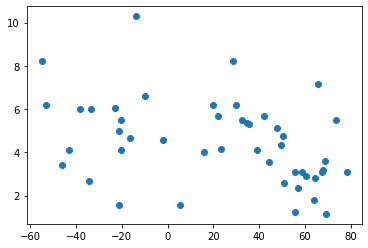

In [15]:
plt.scatter(cleancity['lat'], cleancity['windspeed'])
plt.show()

## Linear Regression

In [25]:
#creating northern and southern hempisphere
northernhemp= cleancity[cleancity['lat']>=0]
southernhemp= cleancity[cleancity['lat']<=0]
northernhemp, southernhemp


(                 city      lat  maxtemp       lng  humidity  cloudiness  \
 1        barra patuca  15.8000    26.10  -84.2833        80          16   
 2               chara  56.9064    -4.52  118.2631        71         100   
 3   zheleznodorozhnyy  55.7503     6.75   38.0042        97         100   
 5            sterling  39.0062    18.48  -77.4286        56         100   
 8   nizhniy tsasuchey  50.5167     4.25  115.1333        47          95   
 9                hilo  19.7297    31.27 -155.0900        73         100   
 10             lompoc  34.6391    18.23 -120.4579        72          75   
 11           thompson  55.7435     3.09  -97.8558        28           0   
 14           tasiilaq  65.6145     0.09  -37.6368        95         100   
 15          jamestown  42.0970    14.77  -79.2353        44          20   
 16       ponta do sol  32.6667    15.40  -17.1000        64          67   
 17               hofn  64.2539     7.54  -15.2082        85           5   
 18     seve

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

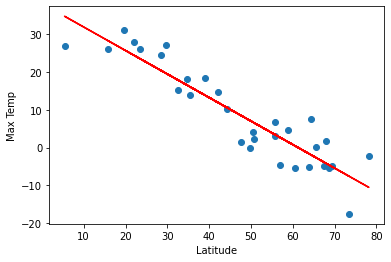

In [26]:
# Add the linear regression equation and line to plot
# northernhemp
x_values = northernhemp['lat']
y_values = northernhemp['maxtemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

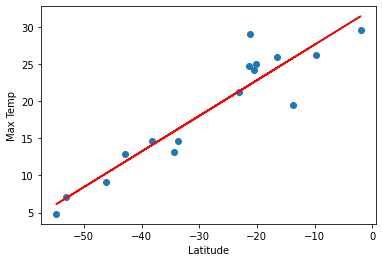

In [27]:
#southernhemp
x_values = southernhemp['lat']
y_values = southernhemp['maxtemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

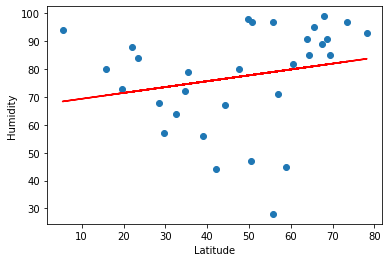

In [29]:

x_values = northernhemp['lat']
y_values = northernhemp['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

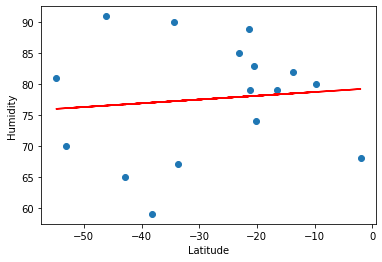

In [30]:
x_values = southernhemp['lat']
y_values = southernhemp['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

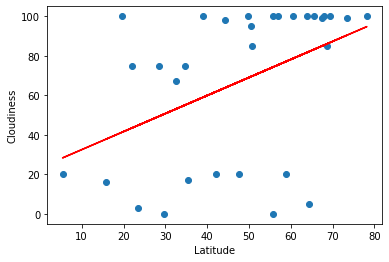

In [31]:
x_values = northernhemp['lat']
y_values = northernhemp['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

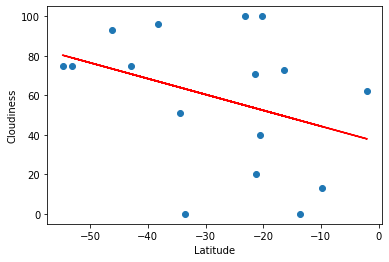

In [32]:
x_values = southernhemp['lat']
y_values = southernhemp['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

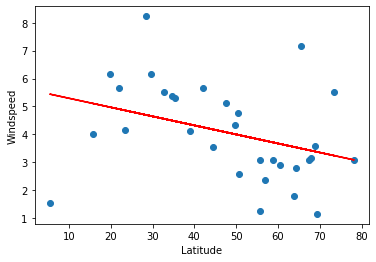

In [33]:
x_values = northernhemp['lat']
y_values = northernhemp['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

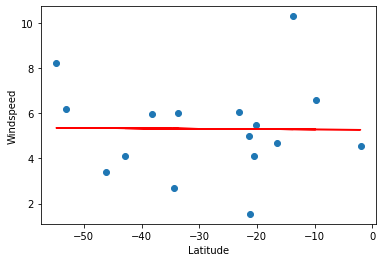

In [34]:
x_values = southernhemp['lat']
y_values = southernhemp['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()